In [1]:
%run -i 'python_functions/cleaning.py'

In [2]:
prediction_data = pd.read_csv('./data/prediction_data/data.csv')

In [3]:
prediction_data

,Year,Month Name,Week,Weekday,Income,Income LY,Growth,Opening Days,Opening Days LY,ADR,Income Rooms,Income Rooms LY,Sold Rooms,Available Rooms,Occupancy Rate,Cancellation Rate,RevPAR,Number of Guests
0,2019,January,1,Tuesday,1543.30 €,NaN,100.00%,1.0,NaN,341.825000,1367.30 €,NaN,4.0,16.0,18.75%,25.00%,85.456250,8.0
1,2019,January,1,Wednesday,6462.91 €,NaN,100.00%,1.0,NaN,511.166250,4089.33 €,NaN,8.0,16.0,37.50%,25.00%,255.583125,15.0
2,2019,January,1,Thursday,2190.10 €,NaN,100.00%,1.0,NaN,246.262500,1970.10 €,NaN,8.0,16.0,37.50%,25.00%,123.131250,9.0
3,2019,January,1,Friday,3265.81 €,NaN,100.00%,1.0,NaN,251.803000,2518.03 €,NaN,10.0,16.0,56.25%,10.00%,157.376875,13.0
4,2019,January,1,Saturday,2225.13 €,NaN,100.00%,1.0,NaN,241.125556,2170.13 €,NaN,9.0,16.0,50.00%,11.11%,135.633125,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,2022,December,52,Tuesday,13696.82 €,8676.83 €,36.65%,1.0,1.0,371.337778,10026.12 €,6993.28 €,27.0,16.0,87.50%,48.15%,626.632500,26.0
1449,2022,December,52,Wednesday,8562.15 €,17568.69 €,-105.19%,1.0,1.0,282.079630,7616.15 €,14202.69 €,27.0,16.0,87.50%,48.15%,476.009375,19.0
1450,2022,December,52,Thursday,8626.43 €,5812.40 €,32.62%,1.0,1.0,445.757222,8023.63 €,4237.20 €,18.0,16.0,62.50%,44.44%,501.476875,14.0
1451,2022,December,52,Friday,18062.98 €,8531.60 €,52.77%,1.0,1.0,785.865714,16503.18 €,4919.20 €,21.0,16.0,81.25%,38.10%,1031.448750,20.0


In [4]:
prediction_data.columns

Index(['Year', 'Month Name', 'Week', 'Weekday', 'Income', 'Income LY',
       'Growth', 'Opening Days', 'Opening Days LY', 'ADR', 'Income Rooms',
       'Income Rooms LY', 'Sold Rooms', 'Available Rooms', 'Occupancy Rate',
       'Cancellation Rate', 'RevPAR', 'Number of Guests'],
      dtype='object')

In [5]:
Weekday_number = {'Monday': 1, 
                  'Tuesday': 2, 
                  'Wednesday': 3, 
                  'Thursday': 4,
                  'Friday': 5,
                  'Saturday': 6,
                  'Sunday': 7}

prediction_data["Weekday_number"] = prediction_data["Weekday"].replace(Weekday_number)

In [6]:
Month_number = {'January': 1, 
                  'February': 2, 
                  'March': 3, 
                  'April': 4,
                  'May': 5,
                  'June': 6,
                  'July': 7,
                  'August': 8,
                  'September': 9,
                  'October': 10,
                  'November': 11,
                  'December': 12}

prediction_data["Month_number"] = prediction_data["Month Name"].replace(Month_number)

In [7]:
prediction_data.drop(['Income LY', 'Opening Days LY', 'Income Rooms LY', 'Month Name', 'Weekday',
                      'Opening Days', 'Available Rooms'], axis=1, inplace=True)

In [8]:
prediction_data['Income'] = prediction_data['Income'].str.replace('€', '')
prediction_data['Growth'] = prediction_data['Growth'].str.replace('%', '')
prediction_data['Income Rooms'] = prediction_data['Income Rooms'].str.replace('€', '')
prediction_data['Occupancy Rate'] = prediction_data['Occupancy Rate'].str.replace('%', '')
prediction_data['Cancellation Rate'] = prediction_data['Cancellation Rate'].str.replace('%', '')


In [9]:
prediction_data.dtypes

Year                   int64
Week                   int64
Income                object
Growth                object
ADR                  float64
Income Rooms          object
Sold Rooms           float64
Occupancy Rate        object
Cancellation Rate     object
RevPAR               float64
Number of Guests     float64
Weekday_number         int64
Month_number           int64
dtype: object

In [10]:
cols_to_convert = ['Income', 'Growth', 'Income Rooms', 'Occupancy Rate', 'Cancellation Rate']
prediction_data[cols_to_convert] = prediction_data[cols_to_convert].astype(float)

In [11]:
corr_matrix = prediction_data.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Year,Week,Income,Growth,ADR,Income Rooms,Sold Rooms,Occupancy Rate,Cancellation Rate,RevPAR,Number of Guests,Weekday_number,Month_number
Year,1.000000,0.002635,0.081364,0.016589,-0.026271,0.022072,0.083464,0.034807,-0.052089,0.032416,0.152429,0.004317,0.002479
Week,0.002635,1.000000,0.072856,0.001698,0.021071,0.053988,0.117049,0.101063,-0.060981,0.061157,0.116834,-0.007604,0.969670
Income,0.081364,0.072856,1.000000,0.043915,0.540590,0.974813,0.566678,0.424643,-0.246696,0.964249,0.607503,0.111385,0.075359
Growth,0.016589,0.001698,0.043915,1.000000,0.042701,0.037880,0.059353,0.214669,-0.072386,0.034933,0.054567,0.014825,0.005871
ADR,-0.026271,0.021071,0.540590,0.042701,1.000000,0.594319,-0.094879,0.012549,0.157467,0.502629,0.040169,0.027610,0.020210
Income Rooms,0.022072,0.053988,0.974813,0.037880,0.594319,1.000000,0.503472,0.355485,-0.200810,0.984781,0.486965,0.052113,0.053203
Sold Rooms,0.083464,0.117049,0.566678,0.059353,-0.094879,0.503472,1.000000,0.850334,-0.548658,0.542980,0.729420,0.116782,0.118657
Occupancy Rate,0.034807,0.101063,0.424643,0.214669,0.012549,0.355485,0.850334,1.000000,-0.374376,0.355485,0.621158,0.147068,0.105275
Cancellation Rate,-0.052089,-0.060981,-0.246696,-0.072386,0.157467,-0.200810,-0.548658,-0.374376,1.000000,-0.296680,-0.415029,-0.046072,-0.076363
RevPAR,0.032416,0.061157,0.964249,0.034933,0.502629,0.984781,0.542980,0.355485,-0.296680,1.000000,0.509786,0.040833,0.061771


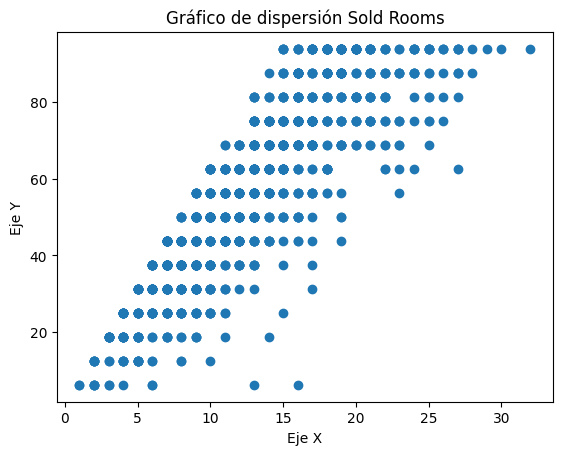

<Figure size 1500x1500 with 0 Axes>

In [12]:
plt.scatter(data=prediction_data, x='Sold Rooms', y='Occupancy Rate')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de dispersión Sold Rooms')
plt.figure(figsize=(15, 15))
plt.show()

In [13]:
prediction_cleaning = prediction_data[(prediction_data['Sold Rooms'] > 0) & (prediction_data['Sold Rooms'] < 30)]

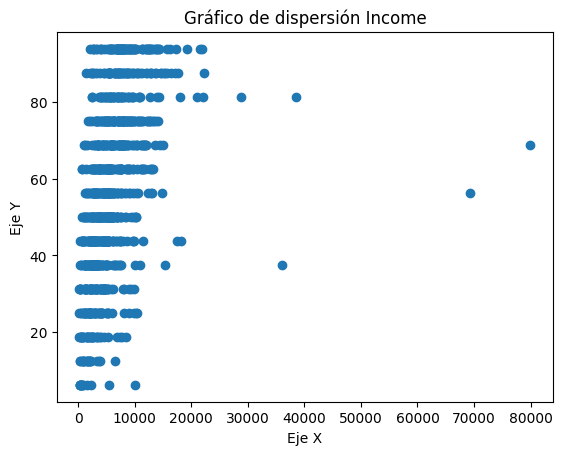

<Figure size 1500x1500 with 0 Axes>

In [14]:
plt.scatter(data=prediction_data, x='Income', y='Occupancy Rate')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de dispersión Income')
plt.figure(figsize=(15, 15))
plt.show()

In [15]:
prediction_cleaning = prediction_data[(prediction_data['Occupancy Rate'] >= 0) & (prediction_data['Occupancy Rate'] < 30000)]

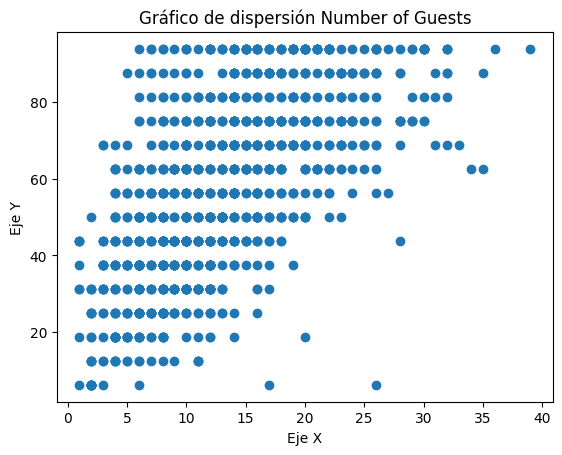

<Figure size 1500x1500 with 0 Axes>

In [16]:
plt.scatter(data=prediction_data, x='Number of Guests', y='Occupancy Rate')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de dispersión Number of Guests')
plt.figure(figsize=(15, 15))
plt.show()

In [17]:
prediction_cleaning = prediction_data[(prediction_data['Number of Guests'] > 0) & (prediction_data['Number of Guests'] < 35)]

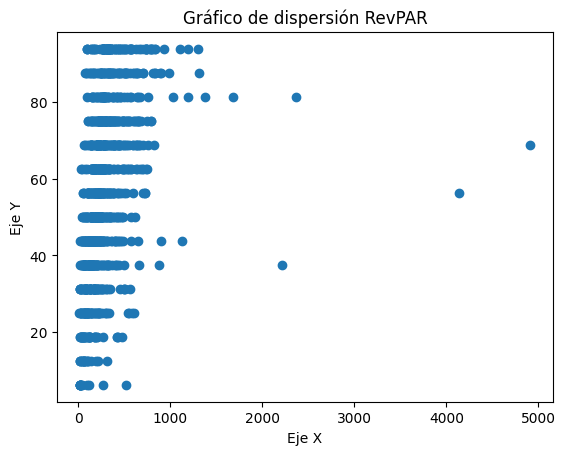

<Figure size 1500x1500 with 0 Axes>

In [18]:
plt.scatter(data=prediction_data, x='RevPAR', y='Occupancy Rate')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de dispersión RevPAR')
plt.figure(figsize=(15, 15))
plt.show()

In [19]:
prediction_cleaning = prediction_data[(prediction_data['RevPAR'] >= 0) & (prediction_data['RevPAR'] < 2000)]

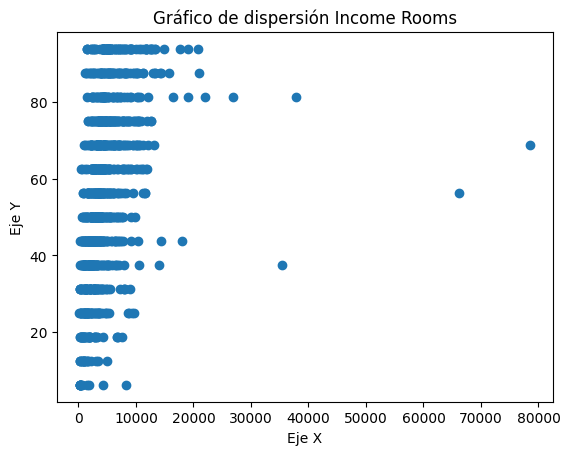

<Figure size 1500x1500 with 0 Axes>

In [20]:
plt.scatter(data=prediction_data, x='Income Rooms', y='Occupancy Rate')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de dispersión Income Rooms')
plt.figure(figsize=(15, 15))
plt.show()

In [21]:
prediction_cleaning = prediction_data[(prediction_data['Income Rooms'] >= 0) & (prediction_data['Income Rooms'] < 30000)]

In [22]:
prediction_clean = prediction_cleaning

In [23]:
min_max = MinMaxScaler()

In [24]:
prediction_normalized = prediction_clean

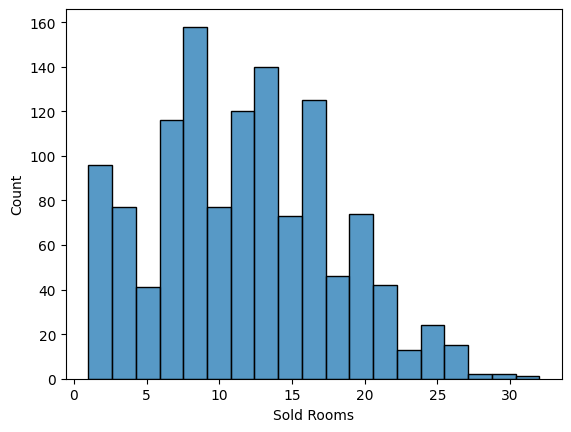

In [25]:
sns.histplot(prediction_clean["Sold Rooms"]);

/var/folders/l5/5487vbvj5d39ng714_0crx5r0000gn/T/ipykernel_75613/414977098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_normalized["Sold Rooms"] = min_max.fit_transform(prediction_normalized["Sold Rooms"].values.reshape(-1,1))


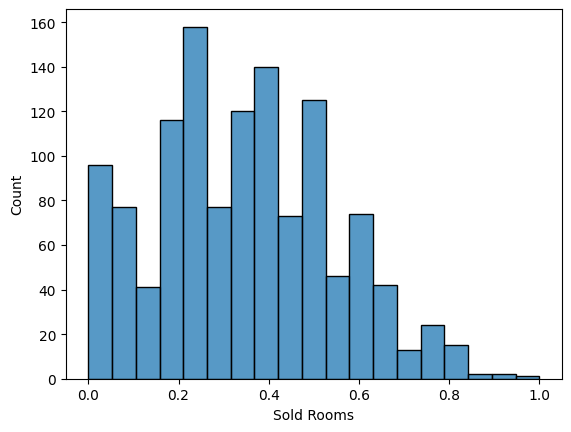

In [26]:
prediction_normalized["Sold Rooms"] = min_max.fit_transform(prediction_normalized["Sold Rooms"].values.reshape(-1,1))
sns.histplot(x=prediction_normalized["Sold Rooms"]);

/var/folders/l5/5487vbvj5d39ng714_0crx5r0000gn/T/ipykernel_75613/2378236791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_normalized["Income"] = min_max.fit_transform(prediction_normalized["Income"].values.reshape(-1,1))


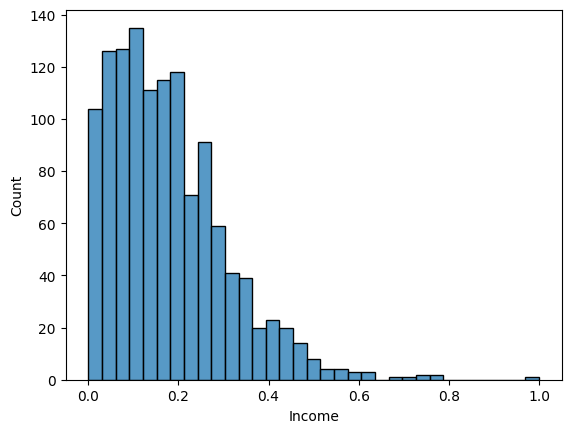

In [27]:
prediction_normalized["Income"] = min_max.fit_transform(prediction_normalized["Income"].values.reshape(-1,1))
sns.histplot(x=prediction_normalized["Income"]);

/var/folders/l5/5487vbvj5d39ng714_0crx5r0000gn/T/ipykernel_75613/3499506434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_normalized["Number of Guests"] = min_max.fit_transform(prediction_normalized["Number of Guests"].values.reshape(-1,1))


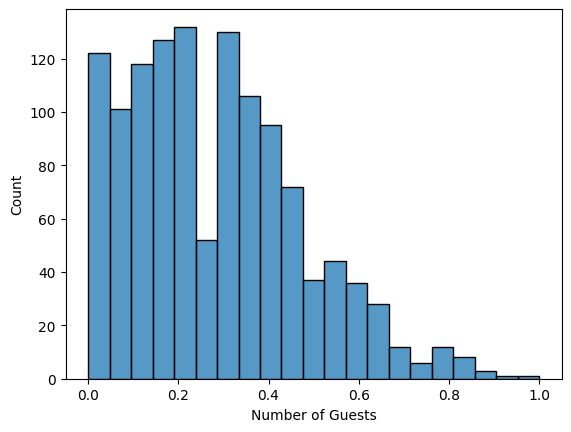

In [28]:
prediction_normalized["Number of Guests"] = min_max.fit_transform(prediction_normalized["Number of Guests"].values.reshape(-1,1))
sns.histplot(x=prediction_normalized["Number of Guests"]);

/var/folders/l5/5487vbvj5d39ng714_0crx5r0000gn/T/ipykernel_75613/3341506400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_normalized["RevPAR"] = min_max.fit_transform(prediction_normalized["RevPAR"].values.reshape(-1,1))


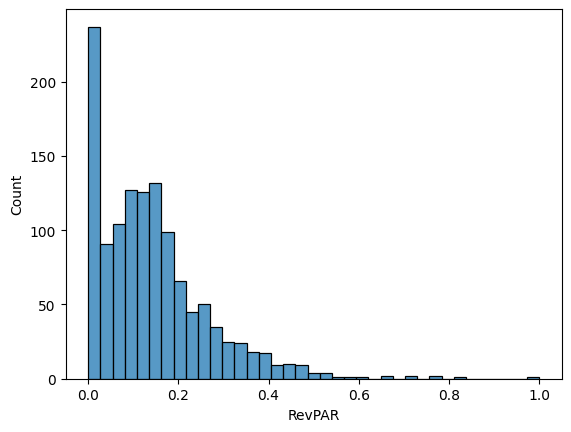

In [29]:
prediction_normalized["RevPAR"] = min_max.fit_transform(prediction_normalized["RevPAR"].values.reshape(-1,1))
sns.histplot(x=prediction_normalized["RevPAR"]);

/var/folders/l5/5487vbvj5d39ng714_0crx5r0000gn/T/ipykernel_75613/2811745973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_normalized["Income Rooms"] = min_max.fit_transform(prediction_normalized["Income Rooms"].values.reshape(-1,1))


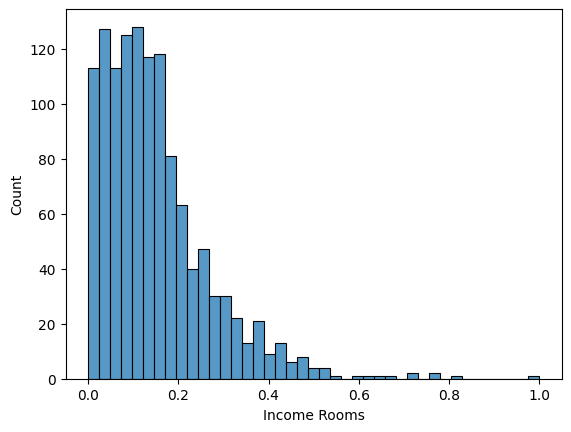

In [30]:
prediction_normalized["Income Rooms"] = min_max.fit_transform(prediction_normalized["Income Rooms"].values.reshape(-1,1))
sns.histplot(x=prediction_normalized["Income Rooms"]);

In [31]:
prediction_normalized.isna().sum()

Year                   0
Week                   0
Income                 0
Growth                 0
ADR                    0
Income Rooms           0
Sold Rooms             1
Occupancy Rate       189
Cancellation Rate     80
RevPAR                 0
Number of Guests       0
Weekday_number         0
Month_number           0
dtype: int64

In [32]:
prediction_normalized.replace([np.inf, -np.inf], np.nan, inplace=True)
prediction_normalized.fillna(0, inplace=True)


/var/folders/l5/5487vbvj5d39ng714_0crx5r0000gn/T/ipykernel_75613/2917373285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_normalized.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/l5/5487vbvj5d39ng714_0crx5r0000gn/T/ipykernel_75613/2917373285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_normalized.fillna(0, inplace=True)


In [33]:
corr_matrix = prediction_normalized.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Year,Week,Income,Growth,ADR,Income Rooms,Sold Rooms,Occupancy Rate,Cancellation Rate,RevPAR,Number of Guests,Weekday_number,Month_number
Year,1.000000,0.052052,0.147906,0.017225,-0.001646,0.079005,0.074630,0.069632,-0.045883,0.090308,0.154931,0.005932,0.053018
Week,0.052052,1.000000,0.119872,0.003026,0.037797,0.103941,0.140571,0.129751,-0.053239,0.110842,0.118366,-0.017654,0.977840
Income,0.147906,0.119872,1.000000,0.055186,0.358093,0.959278,0.692348,0.622732,-0.256231,0.939420,0.763151,0.132396,0.123836
Growth,0.017225,0.003026,0.055186,1.000000,0.047291,0.050151,0.066204,0.066168,-0.081836,0.045203,0.054550,0.017972,0.007809
ADR,-0.001646,0.037797,0.358093,0.047291,1.000000,0.427131,-0.132735,-0.129672,0.172281,0.289707,0.030955,0.026466,0.037045
Income Rooms,0.079005,0.103941,0.959278,0.050151,0.427131,1.000000,0.644125,0.564518,-0.217339,0.972176,0.642418,0.056779,0.103705
Sold Rooms,0.074630,0.140571,0.692348,0.066204,-0.132735,0.644125,1.000000,0.879077,-0.365443,0.685449,0.729608,0.087343,0.141582
Occupancy Rate,0.069632,0.129751,0.622732,0.066168,-0.129672,0.564518,0.879077,1.000000,-0.685271,0.645721,0.686527,0.069387,0.139407
Cancellation Rate,-0.045883,-0.053239,-0.256231,-0.081836,0.172281,-0.217339,-0.365443,-0.685271,1.000000,-0.340467,-0.333151,0.030821,-0.067458
RevPAR,0.090308,0.110842,0.939420,0.045203,0.289707,0.972176,0.685449,0.645721,-0.340467,1.000000,0.660859,0.040701,0.112485


In [34]:
prediction_no_occupancy_rate = prediction_normalized.drop(['Occupancy Rate'], axis=1)

In [35]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(prediction_no_occupancy_rate.values, i) for i in range(prediction_no_occupancy_rate.shape[1])]
vif["features"] = prediction_no_occupancy_rate.columns
print(vif)

    VIF Factor           features
0    18.612657               Year
1   101.193896               Week
2    69.575939             Income
3     1.018477             Growth
4     6.433491                ADR
5   158.498523       Income Rooms
6    13.561539         Sold Rooms
7     4.572201  Cancellation Rate
8    88.077616             RevPAR
9    13.155139   Number of Guests
10    6.022257     Weekday_number
11  112.514849       Month_number


In [36]:
prediction_final = prediction_normalized.drop(['Income Rooms', 'Growth', 'Week', 'RevPAR', 'ADR', 'Income'], axis=1)

In [37]:
corr_matrix = prediction_final.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Year,Sold Rooms,Occupancy Rate,Cancellation Rate,Number of Guests,Weekday_number,Month_number
Year,1.000000,0.074630,0.069632,-0.045883,0.154931,0.005932,0.053018
Sold Rooms,0.074630,1.000000,0.879077,-0.365443,0.729608,0.087343,0.141582
Occupancy Rate,0.069632,0.879077,1.000000,-0.685271,0.686527,0.069387,0.139407
Cancellation Rate,-0.045883,-0.365443,-0.685271,1.000000,-0.333151,0.030821,-0.067458
Number of Guests,0.154931,0.729608,0.686527,-0.333151,1.000000,0.228796,0.124678
Weekday_number,0.005932,0.087343,0.069387,0.030821,0.228796,1.000000,-0.011862
Month_number,0.053018,0.141582,0.139407,-0.067458,0.124678,-0.011862,1.000000


In [38]:
X = prediction_final.drop(['Occupancy Rate'], axis=1)
y = prediction_final['Occupancy Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [39]:
models = {
    "lr": LinearRegression(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "sgd": SGDRegressor(),
    "knn": KNeighborsRegressor(),
    "grad": GradientBoostingRegressor(),
    "svr": SVR()
}

for model in models.values():
    print(f"Training 🏋️: {model} ")
    model.fit(X_train, y_train)

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------------{name}------------\n")
    print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred)}")
    print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred)}")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print("\n")

Training 🏋️: LinearRegression() 
Training 🏋️: Ridge() 
Training 🏋️: Lasso() 
Training 🏋️: SGDRegressor() 
Training 🏋️: KNeighborsRegressor() 
Training 🏋️: GradientBoostingRegressor() 
Training 🏋️: SVR() 
------------lr------------

MAE, error: 6.410055226826455
MSE, error: 71.23718044636708
RMSE, error: 8.440212109086303
r2: 0.9073287207784533


------------ridge------------

MAE, error: 6.497788881626985
MSE, error: 72.62737814488865
RMSE, error: 8.52216980263176
r2: 0.9055202354020585


------------lasso------------

MAE, error: 7.947667080366507
MSE, error: 94.87320895681438
RMSE, error: 9.740287929872217
r2: 0.8765809990963859


------------sgd------------

MAE, error: 923488665385097.5
MSE, error: 8.529310631437041e+29
RMSE, error: 923542669909573.9
r2: -1.1095640256120202e+27


------------knn------------

MAE, error: 13.179260450160772
MSE, error: 307.6617765273312
RMSE, error: 17.5402900924509
r2: 0.5997678428636426


------------grad------------

MAE, error: 1.1698125847807173

In [40]:
grad = GradientBoostingRegressor()

In [41]:
regr = GradientBoostingRegressor().fit(X_train, y_train)

In [42]:
y_pred = regr.predict(X_test)

In [43]:
np.sqrt(mean_squared_error(y_pred, y_test))

2.8916669444167424

In [44]:
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: %.2f" % mse)
print("R-squared: %.2f" % r2)

Mean squared error: 8.36
R-squared: 0.99


In [45]:
occupancy_predictions = regr.predict(X_test)

In [46]:
start_date = pd.Timestamp('2023-01-01')
date_range = pd.date_range(start=start_date, periods=len(occupancy_predictions), freq='D')

# Convert predictions to a Pandas dataframe and add a datetime column for each day
occupancy_predictions_df = pd.DataFrame({'occupancy_rate': occupancy_predictions})
occupancy_predictions_df['date'] = date_range

In [47]:
occupancy_predictions_df

,occupancy_rate,date
0,38.520740,2023-01-01
1,68.715472,2023-01-02
2,0.595384,2023-01-03
3,63.608242,2023-01-04
4,75.028584,2023-01-05
...,...,...
306,49.156155,2023-11-03
307,61.823895,2023-11-04
308,-0.088421,2023-11-05
309,31.942847,2023-11-06


# Version 2

In [48]:
prediction_normalized

,Year,Week,Income,Growth,ADR,Income Rooms,Sold Rooms,Occupancy Rate,Cancellation Rate,RevPAR,Number of Guests,Weekday_number,Month_number
0,2019,1,0.053526,100.00,341.825000,0.050705,0.096774,18.75,25.00,0.050705,0.184211,2,1
1,2019,1,0.224152,100.00,511.166250,0.151648,0.225806,37.50,25.00,0.151648,0.368421,3,1
2,2019,1,0.075959,100.00,246.262500,0.073059,0.225806,37.50,25.00,0.073059,0.210526,4,1
3,2019,1,0.113268,100.00,251.803000,0.093378,0.290323,56.25,10.00,0.093378,0.315789,5,1
4,2019,1,0.077174,100.00,241.125556,0.080476,0.258065,50.00,11.11,0.080476,0.131579,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,2022,52,0.475044,36.65,371.337778,0.371806,0.838710,87.50,48.15,0.371806,0.657895,2,12
1449,2022,52,0.296960,-105.19,282.079630,0.282435,0.838710,87.50,48.15,0.282435,0.473684,3,12
1450,2022,52,0.299189,32.62,445.757222,0.297546,0.548387,62.50,44.44,0.297546,0.342105,4,12
1451,2022,52,0.626475,52.77,785.865714,0.611999,0.645161,81.25,38.10,0.611999,0.500000,5,12


In [51]:
prediction_normalized2 = prediction_normalized.loc[(prediction_normalized['Year'] != 2020) & (prediction_normalized['Year'] != 2021)]

In [52]:
prediction_normalized2

,Year,Week,Income,Growth,ADR,Income Rooms,Sold Rooms,Occupancy Rate,Cancellation Rate,RevPAR,Number of Guests,Weekday_number,Month_number
0,2019,1,0.053526,100.00,341.825000,0.050705,0.096774,18.75,25.00,0.050705,0.184211,2,1
1,2019,1,0.224152,100.00,511.166250,0.151648,0.225806,37.50,25.00,0.151648,0.368421,3,1
2,2019,1,0.075959,100.00,246.262500,0.073059,0.225806,37.50,25.00,0.073059,0.210526,4,1
3,2019,1,0.113268,100.00,251.803000,0.093378,0.290323,56.25,10.00,0.093378,0.315789,5,1
4,2019,1,0.077174,100.00,241.125556,0.080476,0.258065,50.00,11.11,0.080476,0.131579,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,2022,52,0.475044,36.65,371.337778,0.371806,0.838710,87.50,48.15,0.371806,0.657895,2,12
1449,2022,52,0.296960,-105.19,282.079630,0.282435,0.838710,87.50,48.15,0.282435,0.473684,3,12
1450,2022,52,0.299189,32.62,445.757222,0.297546,0.548387,62.50,44.44,0.297546,0.342105,4,12
1451,2022,52,0.626475,52.77,785.865714,0.611999,0.645161,81.25,38.10,0.611999,0.500000,5,12


In [53]:
corr_matrix = prediction_normalized2.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Year,Week,Income,Growth,ADR,Income Rooms,Sold Rooms,Occupancy Rate,Cancellation Rate,RevPAR,Number of Guests,Weekday_number,Month_number
Year,1.000000,0.008256,0.149913,-0.429297,0.060481,0.067818,0.035800,0.002347,0.071027,0.067020,0.142222,0.008421,0.003169
Week,0.008256,1.000000,0.101722,-0.276364,0.046683,0.120304,0.155359,0.097453,0.155114,0.119277,0.021637,0.010394,0.965891
Income,0.149913,0.101722,1.000000,0.084407,0.683212,0.961037,0.617780,0.538565,0.118209,0.961088,0.748237,0.136342,0.102973
Growth,-0.429297,-0.276364,0.084407,1.000000,0.095145,0.108633,0.016807,0.052157,-0.090204,0.110862,0.091865,-0.117270,-0.281705
ADR,0.060481,0.046683,0.683212,0.095145,1.000000,0.745200,0.002888,-0.003127,0.006809,0.744425,0.300966,0.013919,0.046588
Income Rooms,0.067818,0.120304,0.961037,0.108633,0.745200,1.000000,0.572959,0.475993,0.141248,0.999913,0.635697,0.058487,0.117430
Sold Rooms,0.035800,0.155359,0.617780,0.016807,0.002888,0.572959,1.000000,0.839233,0.233391,0.573949,0.664265,0.126564,0.151636
Occupancy Rate,0.002347,0.097453,0.538565,0.052157,-0.003127,0.475993,0.839233,1.000000,-0.267730,0.477483,0.636293,0.176891,0.103609
Cancellation Rate,0.071027,0.155114,0.118209,-0.090204,0.006809,0.141248,0.233391,-0.267730,1.000000,0.137878,0.050678,-0.073792,0.141076
RevPAR,0.067020,0.119277,0.961088,0.110862,0.744425,0.999913,0.573949,0.477483,0.137878,1.000000,0.636165,0.059285,0.116382


In [61]:
prediction_no_occupancy_rate2 = prediction_normalized2.drop(['Occupancy Rate'], axis=1)

In [62]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(prediction_no_occupancy_rate2.values, i) for i in range(prediction_no_occupancy_rate2.shape[1])]
vif["features"] = prediction_no_occupancy_rate2.columns
print(vif)

      VIF Factor           features
0      31.244156               Year
1      62.276010               Week
2      81.882939             Income
3       2.214856             Growth
4      22.803273                ADR
5   20229.433592       Income Rooms
6      30.080853         Sold Rooms
7       5.382563  Cancellation Rate
8   20152.244444             RevPAR
9      14.500277   Number of Guests
10      5.686248     Weekday_number
11     69.523644       Month_number


In [65]:
prediction_final2 = prediction_normalized2.drop(['Income Rooms', 'RevPAR', 'Week'], axis=1)

In [66]:
corr_matrix = prediction_final2.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Year,Income,Growth,ADR,Sold Rooms,Occupancy Rate,Cancellation Rate,Number of Guests,Weekday_number,Month_number
Year,1.000000,0.149913,-0.429297,0.060481,0.035800,0.002347,0.071027,0.142222,0.008421,0.003169
Income,0.149913,1.000000,0.084407,0.683212,0.617780,0.538565,0.118209,0.748237,0.136342,0.102973
Growth,-0.429297,0.084407,1.000000,0.095145,0.016807,0.052157,-0.090204,0.091865,-0.117270,-0.281705
ADR,0.060481,0.683212,0.095145,1.000000,0.002888,-0.003127,0.006809,0.300966,0.013919,0.046588
Sold Rooms,0.035800,0.617780,0.016807,0.002888,1.000000,0.839233,0.233391,0.664265,0.126564,0.151636
Occupancy Rate,0.002347,0.538565,0.052157,-0.003127,0.839233,1.000000,-0.267730,0.636293,0.176891,0.103609
Cancellation Rate,0.071027,0.118209,-0.090204,0.006809,0.233391,-0.267730,1.000000,0.050678,-0.073792,0.141076
Number of Guests,0.142222,0.748237,0.091865,0.300966,0.664265,0.636293,0.050678,1.000000,0.232361,0.021094
Weekday_number,0.008421,0.136342,-0.117270,0.013919,0.126564,0.176891,-0.073792,0.232361,1.000000,0.006343
Month_number,0.003169,0.102973,-0.281705,0.046588,0.151636,0.103609,0.141076,0.021094,0.006343,1.000000


In [67]:
X = prediction_final2.drop(['Occupancy Rate'], axis=1)
y = prediction_final2['Occupancy Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [68]:
models = {
    "lr": LinearRegression(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "sgd": SGDRegressor(),
    "knn": KNeighborsRegressor(),
    "grad": GradientBoostingRegressor(),
    "svr": SVR()
}

for model in models.values():
    print(f"Training 🏋️: {model} ")
    model.fit(X_train, y_train)

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------------{name}------------\n")
    print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred)}")
    print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred)}")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print("\n")

Training 🏋️: LinearRegression() 
Training 🏋️: Ridge() 
Training 🏋️: Lasso() 
Training 🏋️: SGDRegressor() 
Training 🏋️: KNeighborsRegressor() 
Training 🏋️: GradientBoostingRegressor() 
Training 🏋️: SVR() 
------------lr------------

MAE, error: 3.9352548290167864
MSE, error: 28.05605745141087
RMSE, error: 5.296796904867211
r2: 0.9472932600421317


------------ridge------------

MAE, error: 4.200227013641203
MSE, error: 31.552351974585903
RMSE, error: 5.6171480285449045
r2: 0.9407250425879063


------------lasso------------

MAE, error: 6.667936167804703
MSE, error: 63.562099327113984
RMSE, error: 7.972584231421703
r2: 0.8805908119409728


------------sgd------------

MAE, error: 1416644708202183.0
MSE, error: 2.1722171844253682e+30
RMSE, error: 1473844355563153.8
r2: -4.0807760131587314e+27


------------knn------------

MAE, error: 18.3125
MSE, error: 521.328125
RMSE, error: 22.832610998306787
r2: 0.020621269945528486


------------grad------------

MAE, error: 0.8935979418677766
MSE, 

In [69]:
grad = GradientBoostingRegressor()

In [70]:
regr = GradientBoostingRegressor().fit(X_train, y_train)

In [71]:
y_pred = regr.predict(X_test)

In [72]:
np.sqrt(mean_squared_error(y_pred, y_test))

1.3074791828049106

In [73]:
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: %.2f" % mse)
print("R-squared: %.2f" % r2)

Mean squared error: 1.71
R-squared: 1.00


In [79]:
occupancy_predictions2 = regr.predict(X_test)

In [75]:
start_date = pd.Timestamp('2023-01-01')
date_range = pd.date_range(start=start_date, periods=len(occupancy_predictions2), freq='D')

# Convert predictions to a Pandas dataframe and add a datetime column for each day
occupancy_predictions_df2 = pd.DataFrame({'occupancy_rate': occupancy_predictions2})
occupancy_predictions_df2['date'] = date_range

In [82]:
occupancy_predictions_df2['occupancy_rate'] = occupancy_predictions_df2.occupancy_rate.round(2)

In [83]:
occupancy_predictions_df2.to_csv(f'./data/prediction_data/occupancy_predicted.csv', index=False)